# Stroken Prediction 

### Contexto: 

De acordo com a Organização Mundial da Saúde (OMS), o AVC é a segunda principal causa de morte globalmente, sendo responsável por aproximadamente 11% do total de mortes. Este conjunto de dados é usado para prever se um paciente tem probabilidade de sofrer um AVC com base em parâmetros de entrada, como gênero, idade, várias doenças e status de tabagismo. Cada linha nos dados fornece informações relevantes sobre o paciente.

### Informações sobre atributos:
1) __id__: identificador único
2) __gênero__: "Masculino", "Feminino" ou "Outro"
3) __idade__: idade do paciente
4) __hipertensão__: 0 se o paciente não tiver hipertensão, 1 se o paciente tiver hipertensão
5) __doença cardíaca__: 0 se o paciente não tiver doença cardíaca, 1 se o paciente tiver doença cardíaca
6) __já casado__: "Não" ou "Sim"
7) __tipo de trabalho__: "crianças"(`children`), "Funcionário público"(`Govt_jov`), "Nunca trabalhou"(`Never_worked`), "Privado"(`Private`) ou "Autônomo"(`Self-employed`)
8) __tipo de residência__: "Rural" ou "Urbana"
9) __nível médio de glicose__: nível médio de glicose no sangue
10) __IMC__: índice de massa corporal
11) __status de tabagismo__: "ex-fumante"(`formerly smoked`), "nunca fumou"(`formerly smoked`), "fuma"(`smokes`) ou "Desconhecido"(`Unknown`)
12) __AVC__: 1 se o paciente teve um AVC ou 0 se não teve

> Nota: "Desconhecido" em status de tabagismo significa que as informações não estão disponíveis para este paciente.

In [1]:
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt

In [2]:
data =  pd.read_csv(r'datasets/StrokePredictionDataset/healthcare-dataset-stroke-data.csv',sep=',')

In [3]:
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Analise dos dados

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
data.shape

(5110, 12)

### Removendo valores `NULL` | `NAN` no meu conjunto de dados

In [6]:
data.dropna(inplace= True)

In [7]:
for nameColumn in data.columns:
    selecao = data[nameColumn].loc[ data[nameColumn].isna() == True ]
    if len(selecao) != 0 : print(f'na coluna {nameColumn} tem valores NULL | NaN')
print('OK')

OK


### Hipertensão

verificando as pessoas que tem ou não hipertensão e depois obteve AVC 

In [8]:
countHipeStrokes = data.groupby(by=['stroke'])['hypertension'].value_counts().reset_index(name='quantity')

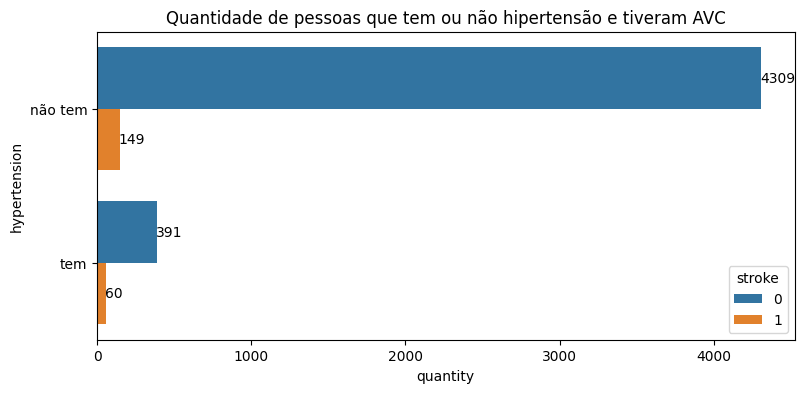

In [9]:
plt.figure(figsize=(9,4))
bar = sea.barplot(
    countHipeStrokes,
    x = countHipeStrokes['quantity'],
    y = countHipeStrokes['hypertension'],
    hue =countHipeStrokes['stroke'],
    orient='h',
    width=0.8
)

plt.yticks([0,1],['não tem','tem'])
for p in bar.patches:
    if p.get_width() != 0: bar.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2), xytext=(-1, 0), textcoords='offset points', ha='left', va="center")
plt.title('Quantidade de pessoas que tem ou não hipertensão e tiveram AVC')
plt.show()

### Doença cardiaca
vou fazer pela mesma logica feito acima

In [10]:
countHeartStrokes = data.groupby(by=['stroke'])['heart_disease'].value_counts().reset_index(name='quantity')

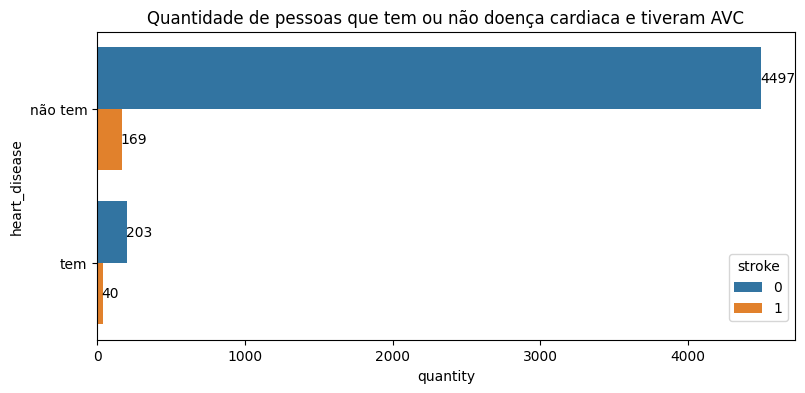

In [11]:
plt.figure(figsize=(9,4))
bar = sea.barplot(
    countHeartStrokes,
    x = countHeartStrokes['quantity'],
    y = countHeartStrokes['heart_disease'],
    hue =countHeartStrokes['stroke'],
    orient='h',
    width=0.8
)
plt.yticks([0,1],['não tem','tem'])
plt.legend(bbox_to_anchor=(1,0.3,0,0),title='stroke')
for p in bar.patches:
    if p.get_width() != 0:
        bar.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2), xytext=(-1, 0), textcoords='offset points', ha='left', va="center")
plt.title('Quantidade de pessoas que tem ou não doença cardiaca e tiveram AVC')
plt.show()

### Doença cardiaca e hipertensão

In [12]:
countHipeHeathStrokes = data.groupby( by=['stroke'])[['hypertension','heart_disease']].value_counts().reset_index(name='quantity')

In [13]:
countHipeHeathStrokes['%'] = countHipeHeathStrokes['quantity']/countHipeHeathStrokes['quantity'].sum()*100

In [14]:
pd.options.mode.chained_assignment = None 
for coluna in countHipeHeathStrokes.columns[:3]:
    countHipeHeathStrokes[coluna].loc[ countHipeHeathStrokes[coluna] == 0 ] = 'não teve'
    countHipeHeathStrokes[coluna].loc[ countHipeHeathStrokes[coluna] == 1 ] = 'teve'

/tmp/ipykernel_10367/3458631651.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'não teve' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  countHipeHeathStrokes[coluna].loc[ countHipeHeathStrokes[coluna] == 0 ] = 'não teve'
/tmp/ipykernel_10367/3458631651.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'não teve' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  countHipeHeathStrokes[coluna].loc[ countHipeHeathStrokes[coluna] == 0 ] = 'não teve'
/tmp/ipykernel_10367/3458631651.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'não teve' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  countHipeHeathStrokes[coluna].loc[ countHipeHeathStrokes[coluna] 

In [15]:
countHipeHeathStrokes

,stroke,hypertension,heart_disease,quantity,%
0,não teve,não teve,não teve,4153,84.599715
1,não teve,teve,não teve,344,7.007537
2,não teve,não teve,teve,156,3.177837
3,não teve,teve,teve,47,0.957425
4,teve,não teve,não teve,120,2.444490
5,teve,teve,não teve,49,0.998167
6,teve,não teve,teve,29,0.590752
7,teve,teve,teve,11,0.224078


### Strokes

In [16]:
countStrokes = data['stroke'].value_counts().reset_index(name='quantity')

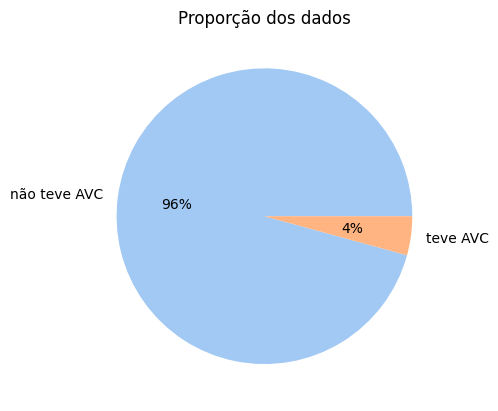

In [17]:
colors = sea.color_palette('pastel')[0:2]
pie = plt.pie( x = countStrokes['quantity'] , labels = ['não teve AVC','teve AVC'],colors = colors,autopct="%.0f%%" )
plt.title('Proporção dos dados')
plt.show()

#### __OBS !!! __
> O há um desiquilibrio entre as classes stroke para a predição se faz necessário um hoversampling ou undersampling.

&nbsp;

### Tipo de residencia

In [18]:
data['Residence_type'].value_counts().reset_index(name='Quantity')

,Residence_type,Quantity
0,Urban,2490
1,Rural,2419


### tipo de tabalho

In [19]:
data['work_type'].value_counts().reset_index(name='quantidade')

,work_type,quantidade
0,Private,2811
1,Self-employed,775
2,children,671
3,Govt_job,630
4,Never_worked,22


### Por genero

In [20]:
data['gender'].value_counts().reset_index(name='quantidade')

,gender,quantidade
0,Female,2897
1,Male,2011
2,Other,1


devido `other` possui dado insuficiente será retirado da tabela 

In [21]:
data.drop( index   = ( data.loc[data['gender'] == 'Other'].index ),  inplace = True  )

In [22]:
data['gender'].value_counts().reset_index(name='quantidade')

,gender,quantidade
0,Female,2897
1,Male,2011


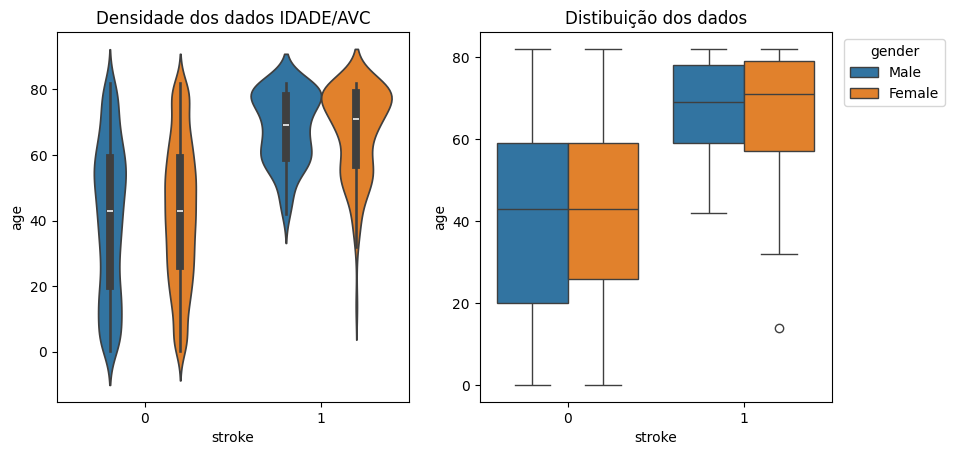

In [23]:
fig ,ax = plt.subplots(1,2)
fig.set_figwidth(10)

sea.violinplot(
    data , 
    x   = data['stroke'], 
    y   = data['age']   ,
    hue = data['gender'],
    ax  = ax[0],
    legend = False
)
ax[0].set_title('Densidade dos dados IDADE/AVC')

sea.boxplot( x = data['stroke'],  y = data['age'] , hue= data['gender'], ax = ax[1] )
ax[1].set_title('Distibuição dos dados')
ax[1].legend(bbox_to_anchor=(1.34,1,0,0),title='gender')
plt.show()

In [24]:
meanYearStroke = data.groupby(by=['gender','stroke'])['age'].mean().reset_index(name='mean')

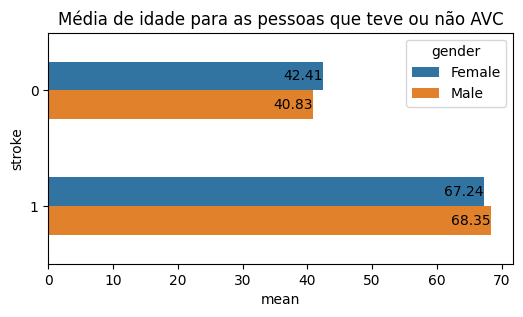

In [25]:
plt.figure(figsize=(6,3))
bar = sea.barplot(
    data = meanYearStroke,
    x    = meanYearStroke['mean'],
    y    = meanYearStroke['stroke'],
    hue  = meanYearStroke['gender'],
    orient = 'h',
    width  = 0.5
)

for p in bar.patches:
    if p.get_width() != 0:
        bar.annotate("%.2f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2), xytext=(0, 0), textcoords='offset points', ha='right', va="center")
plt.title('Média de idade para as pessoas que teve ou não AVC')
plt.show()

In [26]:
data.groupby(by=['stroke','gender'])['work_type'].value_counts().reset_index()

,stroke,gender,work_type,count
0,0,Female,Private,1638
1,0,Female,Self-employed,444
2,0,Female,Govt_job,365
3,0,Female,children,319
4,0,Female,Never_worked,11
5,0,Male,Private,1045
6,0,Male,children,351
7,0,Male,Self-employed,278
8,0,Male,Govt_job,237
9,0,Male,Never_worked,11


### status de tabagismo

In [27]:
data['smoking_status'].value_counts().reset_index(name='quantity')

,smoking_status,quantity
0,never smoked,1852
1,Unknown,1483
2,formerly smoked,836
3,smokes,737


In [28]:
selectTab = data[['avg_glucose_level','bmi','smoking_status','age']]

In [29]:
data.groupby(by='stroke')['smoking_status'].value_counts().reset_index(name='quantity')

,stroke,smoking_status,quantity
0,0,never smoked,1768
1,0,Unknown,1454
2,0,formerly smoked,779
3,0,smokes,698
4,1,never smoked,84
5,1,formerly smoked,57
6,1,smokes,39
7,1,Unknown,29


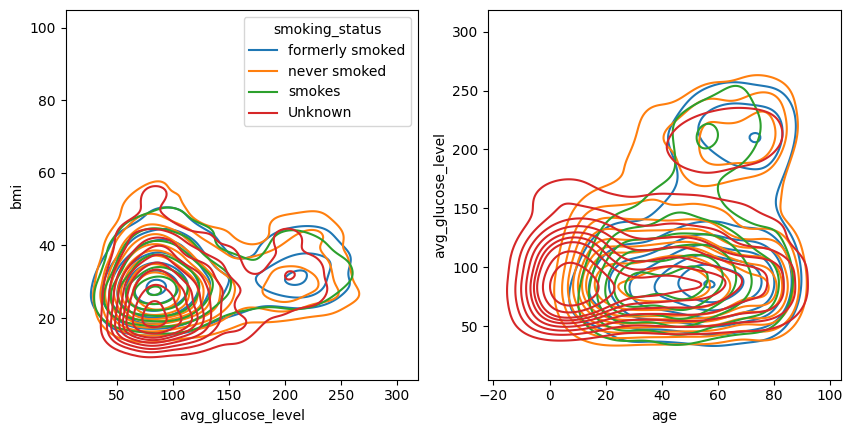

In [30]:
fig , ax = plt.subplots(1,2)
fig.set_figwidth(10)
sea.kdeplot(
    selectTab,
    x = selectTab['avg_glucose_level'],
    y = selectTab['bmi'],
    hue = selectTab['smoking_status'],
    ax   = ax[0],
    legend=True
    
)
sea.kdeplot(
    selectTab,
    x   = selectTab['age'],
    y   = selectTab['avg_glucose_level'],
    hue = selectTab['smoking_status'],
    ax  = ax[1],
    legend=False

)
plt.show()

&nbsp;

&nbsp;

# Classificação

In [31]:
import copy
from sklearn.metrics         import *
from sklearn.preprocessing   import OrdinalEncoder,LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression
from sklearn.tree            import DecisionTreeClassifier
from sklearn.neighbors       import KNeighborsClassifier

### Tratamento dos dados

In [32]:
dataset = copy.deepcopy(data)

##### removendo coluna que chave extrangeira

In [33]:
dataset.drop( columns = ['id'], inplace = True )

##### Passando dados categoricos para numericos

#### ever_married

In [34]:
classeCasado = LabelBinarizer()

In [35]:
dataset['ever_married'] = classeCasado.fit_transform(dataset['ever_married'])

##### Gender

In [36]:
classeGenero = LabelBinarizer()

In [37]:
dataset['gender'] = classeGenero.fit_transform(dataset['gender'])

##### Residence_type

In [38]:
classeTipoResidencia = LabelBinarizer()

In [39]:
dataset['Residence_type'] = classeTipoResidencia.fit_transform(dataset['Residence_type'])

##### work_type

In [40]:
dummiesWork = pd.get_dummies(data['work_type'],dtype=int,prefix='workType')

In [41]:
dataset    = pd.concat( [dataset,dummiesWork],axis=1 ) 

In [42]:
dataset.drop( columns=['work_type'] ,inplace=True )

##### smoking_status

In [43]:
dummiesSmokingStatus = pd.get_dummies(data['smoking_status'],dtype=int,prefix='smokingStatus')

In [44]:
dataset = pd.concat( [dataset,dummiesSmokingStatus],axis=1 ) 

In [45]:
dataset.drop( columns='smoking_status' ,inplace=True )

#### Resultado final do tratamento

In [46]:
dataset.head(2)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,workType_Govt_job,workType_Never_worked,workType_Private,workType_Self-employed,workType_children,smokingStatus_Unknown,smokingStatus_formerly smoked,smokingStatus_never smoked,smokingStatus_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,0,1,0


#### Correlação

In [47]:
dataset.corrwith(dataset['stroke']).reset_index(name='Corr')

,index,Corr
0,gender,0.006904
1,age,0.232313
2,hypertension,0.142503
3,heart_disease,0.137929
4,ever_married,0.105051
5,Residence_type,0.005988
6,avg_glucose_level,0.138984
7,bmi,0.042341
8,stroke,1.000000
9,workType_Govt_job,0.003537


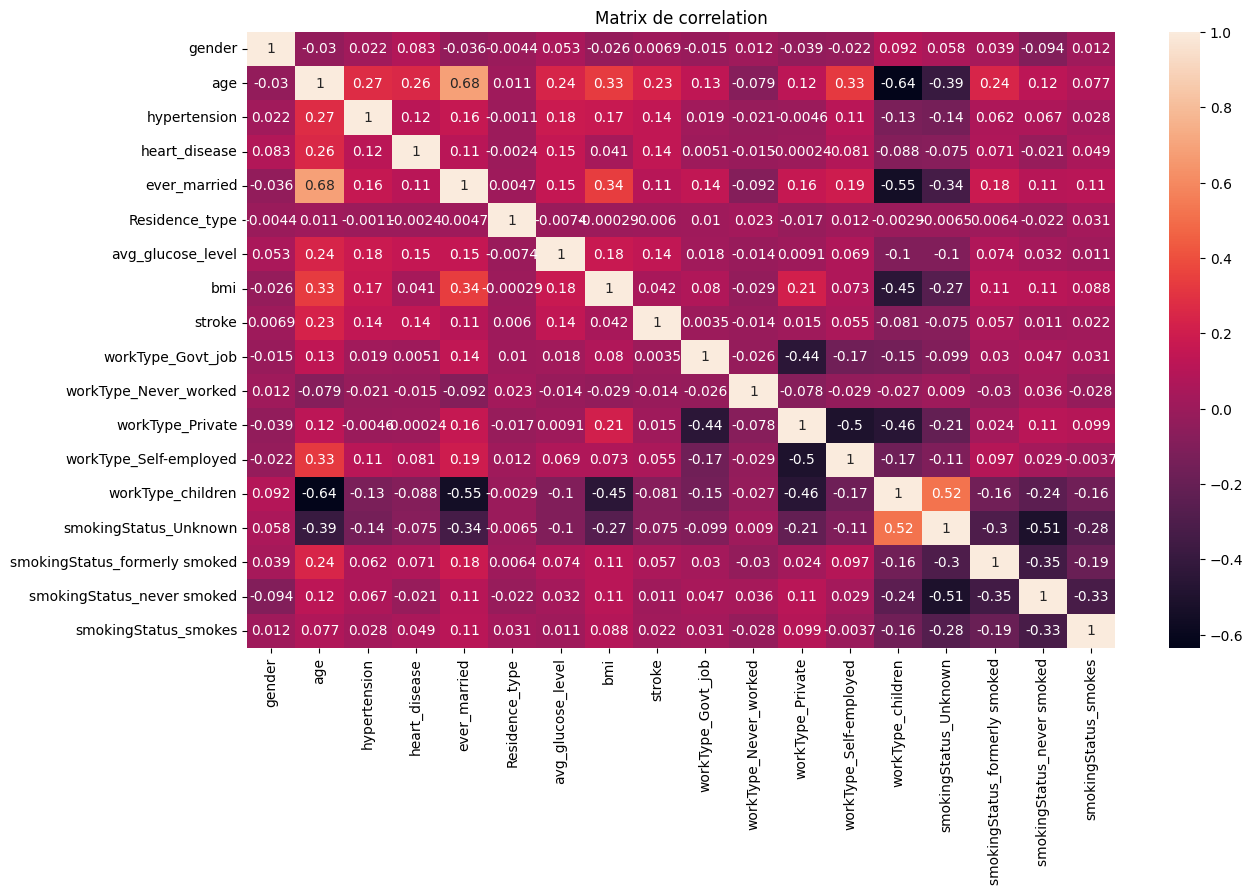

In [48]:
plt.figure(figsize=(14,8))
sea.heatmap(dataset.corr(),annot=True)
plt.title('Matrix de correlation')
plt.show()

# Baleceamento de dados
Irei fazer tanto o undersampling quanto o oversampling ao final irei mostra meus resultados

In [49]:
import numpy as np
from imblearn.over_sampling  import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

&nbsp;

#### OVERSAMPLING

In [50]:
over = RandomOverSampler(sampling_strategy=1)

In [51]:
X = dataset.drop(columns=['stroke'])
Y = dataset['stroke']

In [52]:
xOVER , yOVER = over.fit_resample(X,Y)

In [53]:
xtrain , xtest , ytrain , ytest = train_test_split(xOVER,yOVER,test_size=0.3)

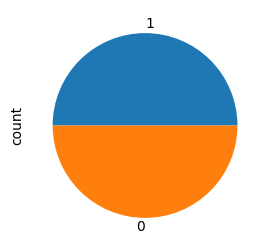

In [64]:
plt.figure(figsize=(4,3))
yOVER.value_counts().plot.pie()
plt.show()

#### KNN

In [55]:
knn = KNeighborsClassifier()

In [56]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [57]:
pred = knn.predict(xtest)

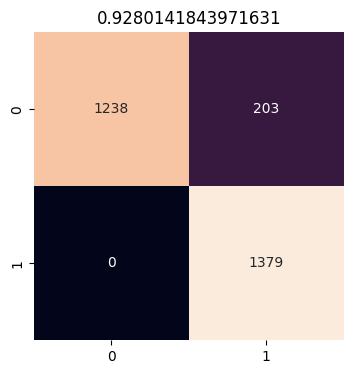

In [79]:
plt.figure(figsize=(4,4))
sea.heatmap(confusion_matrix(ytest,pred),annot=True,cbar=False,fmt='')
plt.title(f'{accuracy_score(ytest,pred)}')
plt.show()

In [59]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92      1441
           1       0.87      1.00      0.93      1379

    accuracy                           0.93      2820
   macro avg       0.94      0.93      0.93      2820
weighted avg       0.94      0.93      0.93      2820

